# Introduction to Qiskit programming

### Useful resources
Qiskit Textbook: https://qiskit.org/textbook  
Qiskit Tutorial: https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html  
Qiskit API documentation: https://qiskit.org/documentation/index.html

# Import Qiskit (and numpy)

In [19]:
import numpy as np
from qiskit import *

For some of the visualization functions you also need to install ``pylatexenc``.

In [20]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nguye\Desktop\Quantum Info\Assignment_Qiskit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Quantum circuits
``QuantumCircuit`` is the class used to represent a quantum circuit. A quantum circuit can contain any number of qubits and (optionally) classical bits. The classical bits are used to store measurements, for example, you can measure the first qubit and place the result ($0$ or $1$) to the first classical bit.  
**Syntax**: ``circ = QuantumCircuit(n_qubits, n_bits)``  
This makes a new circuit object ``circ`` with a quantum register with ``n_qubits`` qubits and a classical register with ``n_bits`` classical bits.

In [21]:
n_qubits = 2
n_bits = 2
circ = QuantumCircuit(n_qubits, n_bits)

### Adding gates to a circuit

Gates are added to a quantum circuit using class methods of the circuit.

Common one-qubit gates:  
**Hadamard gate, H**: ``QuantumCircuit.h(qubit)``  
**Phase gate, S**: ``QuantumCircuit.s(qubit)``  
**$\pi/8$ gate, T**: ``QuantumCircuit.t(qubit)``  
**Pauli-X gate, X**: ``QuantumCircuit.x(qubit)``  
**Pauli-Y gate, Y**: ``QuantumCircuit.y(qubit)``  
**Pauli-Z gate, Z**: ``QuantumCircuit.z(qubit)``  

Common two-qubit gates:  
**CNOT gate, controlled-X**: ``QuantumCircuit.cx(control, target)``  
**Controlled-Y**: ``QuantumCircuit.cy(control, target)``  
**Controlled-Z**: ``QuantumCircuit.cz(control, target)``  
**SWAP gate**: ``QuantumCircuit.swap(qubit1, qubit2)``

You can easily draw a diagram of your quantum circuit with ``QuantumCircuit.draw()``.

In [22]:
circ.h(0)         # Apply Hadamard on the first qubit
circ.cx(0, 1)     # Apply CNOT with the second qubit as the control and first qubit as the target
circ.draw()       # Draw the circuit

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

The drawing method has a few useful keyword arguments:  
``QuantumCircuit.draw(output='text')`` controls the drawing method. This defaults to ``output='text'``. For a nicer looking plot you can use ``output='mpl'``.

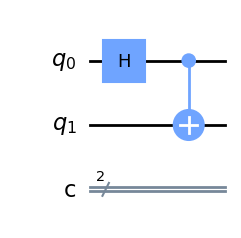

In [23]:
circ.draw('mpl')

Alternatively you can use latex-compiled figures with ``output='latex'``

In [24]:
#circ.draw('latex')

The ``QuantumCircuit.draw()``-method can also be used to export these figures to image files

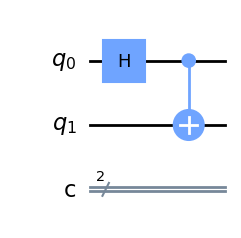

In [25]:
circ.draw(output='mpl', filename='circuit.png')

### Useful operations on quantum circuits

Concatenation: two compatible circuits can be added together

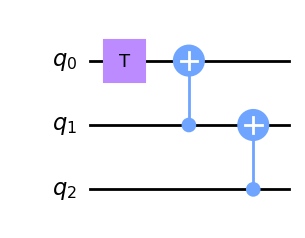

In [26]:
circ1 = QuantumCircuit(3)
circ1.t(0)
circ1.cx(1, 0)
circ1.cx(2, 1)
circ1.draw('mpl')

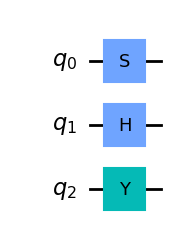

In [27]:
circ2 = QuantumCircuit(3)
circ2.s(0)
circ2.h(1)
circ2.y(2)
circ2.draw('mpl')

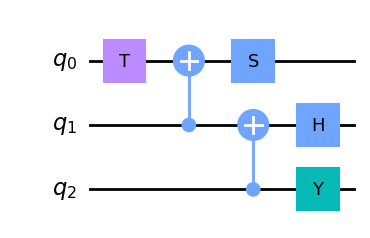

In [28]:
circ3 = circ1.compose(circ2)
circ3.draw('mpl')

Inverses: the circuit corresponds to some unitary operator on $n$ qubits. Its Hermitian conjugate can be calculated with ``QuantumCircuit.inverse()``

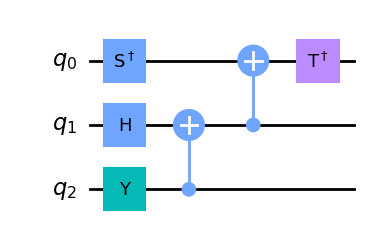

In [29]:
circ3.inverse().draw('mpl')

### Barriers

Sometimes one wants to align gates horizontally in a specific way to highlight some logical sequence of actions. By default, all gates added to the circuit are pulled as left as possible when drawing the circuit. Consider the circuit

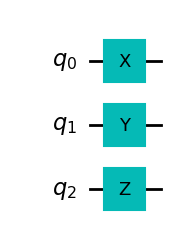

In [30]:
circ4 = QuantumCircuit(3)
circ4.x(0)
circ4.y(1)
circ4.z(2)
circ4.draw('mpl')

Suppose I wanted to draw the operations staggered in a way that highlights that first I apply the X-gate, then the Y-gate, and finally the Z-gate. This can be done by adding barriers in the circuit. The barriers do nothing except affect how the circuit is drawn.

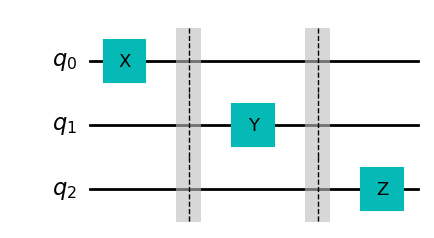

In [31]:
circ4 = QuantumCircuit(3)
circ4.x(0)
circ4.barrier()
circ4.y(1)
circ4.barrier()
circ4.z(2)
circ4.draw('mpl')

Now if I want to maintain the horizontal gate positions but don't want to see the barriers, I can pass the argument ``plot_barriers=False`` to ``QuantumCircuit.draw()``.

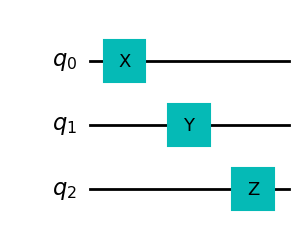

In [32]:
circ4.draw('mpl', plot_barriers=False)

### Measurements

We haven't yet added any measurements to our circuits. On real devices we always want to measure some qubits in the end to extract information about the result of the computation. Measurements are added to the circuit with ``QuantumCircuit.measure(qubit, cbit)``-method. This measures the qubit ``qubit`` into the classical bit ``cbit``.

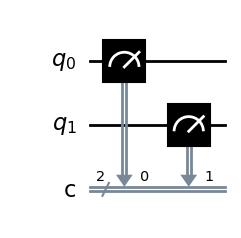

In [33]:
circ = QuantumCircuit(2, 2)
circ.measure(0, 0)
circ.measure(1, 1)
circ.draw('mpl')

You can also make many measurements in a single call to ``QuantumCircuit.measure``

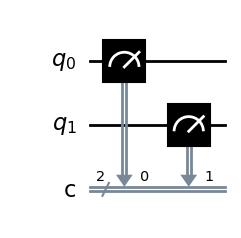

In [34]:
circ = QuantumCircuit(2, 2)
circ.measure([0, 1], [0, 1])
circ.draw('mpl')

The ``QuantumCircuit.measure_all()`` -method can be used to automatically add measurements to all qubits. This also adds automatically the classical registers necessary for storing the measurements.

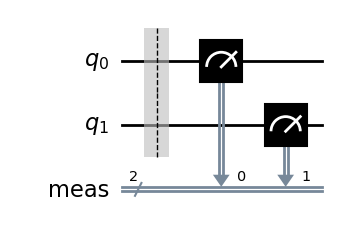

In [35]:
circ = QuantumCircuit(2)       # Note that now we add only a quantum register with 2 qubits
circ.measure_all()             # This adds automatically 2 classical registers to the circuit
circ.draw('mpl')

# Simulating quantum circuits

``qiskit.Aer`` provides multiple backends for running quantum computations:
* Statevector backend: evolves the quantum state according to the given circuit and outputs the resulting state vector.
* Unitary backend: computes the unitary matrix corresponding to the given quantum circuit.
* QASM backend: simulates the circuit and outputs how often different measurement outcomes occurred.

In [36]:
from qiskit import Aer

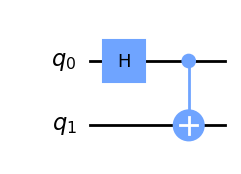

In [37]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

### Statevector simulator

In [38]:
# Get the statevector backend
backend = Aer.get_backend('statevector_simulator')
# Execute the circuit on this backend and get the results
results = execute(circ, backend).result()

In [39]:
# Get the statevector from the results-object
results.get_statevector()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


### Unitary simulator
Let's take the same circuit and compute the corresponding unitary with the unitary backend.

In [40]:
# Get the unitary backend
backend = Aer.get_backend('unitary_simulator')
# Run and get the results
results = execute(circ, backend).result()

In [41]:
# Get the unitary from the results-object
results.get_unitary()

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))

### QASM simulator
If we now take the same circuit and run it in the QASM simulator, **we will not** get the expected results!

In [42]:
# Get the QASM backend 
backend = Aer.get_backend('qasm_simulator')
# Run and get results
results = execute(circ, backend, shots=1024).result()

Now if we look at the counts of different outcomes we obtain

In [43]:
results.get_counts()

QiskitError: 'No counts for experiment "0"'

Why is this? This happens because the circuit has no measurements and therefore no results for any measurements.

Let's fix this by adding measurements in our circuit.

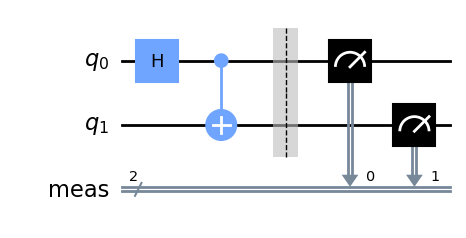

In [44]:
circ.measure_all()
circ.draw('mpl')

Now re-run the circuit.

In [45]:
results = execute(circ, backend, shots=1024).result()
counts = results.get_counts()
counts

{'11': 503, '00': 521}

In the case of the QASM simulator, we can explicitly specify ``shots=1024`` to run our circuit $1024$ times in order to get an approximation to the outcome distribution.

# Visualizations
Qiskit provides several useful visualization functions in the ``qiskit.visualization``-package. Here we'll demonstrate some of them

In [ ]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

### Histograms  
Histograms are useful in inspecting QASM simulator results.

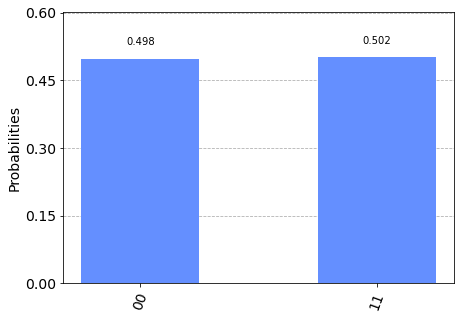

In [ ]:
plot_histogram(counts)

### State city
This plots the real and imaginary parts of the quantum state.

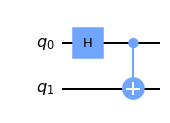

In [ ]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
# Execute the circuit on this backend and get the results
results = execute(circ, backend).result()
state = results.get_statevector()
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


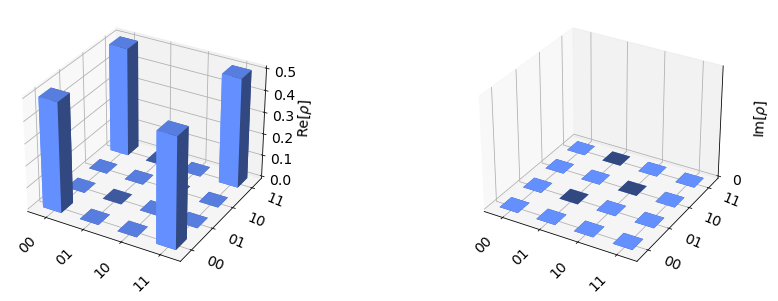

In [ ]:
plot_state_city(state)

### Bloch sphere

In [ ]:
backend = Aer.get_backend('statevector_simulator')

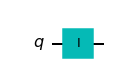

Final state = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


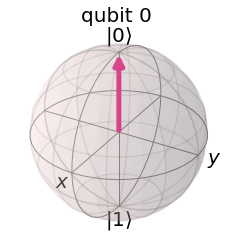

In [ ]:
circ = QuantumCircuit(1)
circ.id(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)

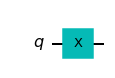

Final state = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


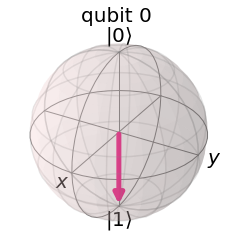

In [ ]:
circ = QuantumCircuit(1)
circ.x(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)

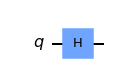

Final state = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


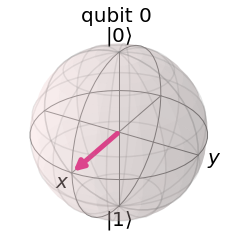

In [ ]:
circ = QuantumCircuit(1)
circ.h(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)

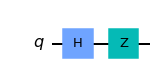

Final state = Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


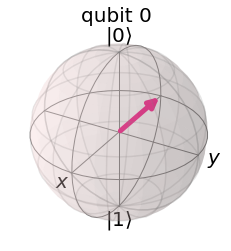

In [ ]:
circ = QuantumCircuit(1)
circ.h(0)
circ.z(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)

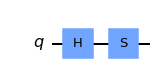

Final state = Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


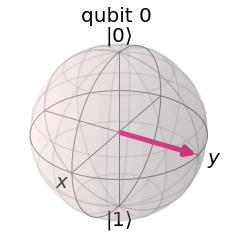

In [ ]:
circ = QuantumCircuit(1)
circ.h(0)
circ.s(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)

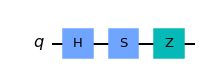

Final state = Statevector([7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j],
            dims=(2,))


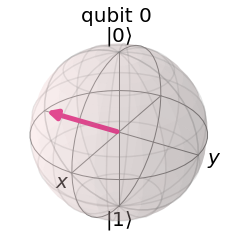

In [ ]:
circ = QuantumCircuit(1)
circ.h(0)
circ.s(0)
circ.z(0)
state = execute(circ, backend).result().get_statevector()
display(circ.draw('mpl'))
print('Final state =', state)
plot_bloch_multivector(state)